#### Michael Perrine 
#### Week 11 Assignment
#### DSC 550
#### Professor Warner


<h1><center>Image Analysis</center></h1>

In [76]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import estimator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,r2_score


1. Import data from keras

In [68]:
# Load data and create the X_train, X_test, y_train, _y_test
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
# this series of code prints out the length of the X_train, X_test, y_train and y_test
print('Initial shape or dimensions of X_train :' + str(len(X_train.shape)))

print('Number of samples in our training data set :' + str(len(X_train)))
print('Number of samples in our training data set :' + str(len(y_train)))
print('Number of samples in our training data set :' + str(len(X_test)))
print('Number of samples in our training data set :' + str(len(y_test)))
print()
print('Dimensions of X_train :' + str(X_train[0].shape))
print('Labels in X_train :' + str(y_train.shape))
print()
print('Dimensions of X_test :' + str(X_test[0].shape))
print('Labels in y_test :' + str(y_test.shape))



Initial shape or dimensions of X_train :3
Number of samples in our training data set :60000
Number of samples in our training data set :60000
Number of samples in our training data set :10000
Number of samples in our training data set :10000

Dimensions of X_train :(28, 28)
Labels in X_train :(60000,)

Dimensions of X_test :(28, 28)
Labels in y_test :(10000,)


2. Display the first 5 images

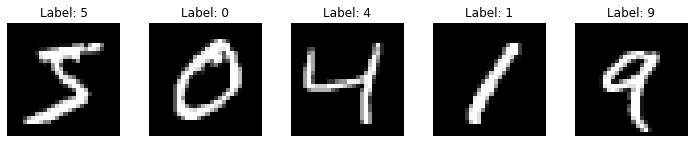

In [ ]:
# This code displays the first five numbers and their labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

3. Build and train model


In [ ]:
# The following series of code builds and trains the CNN model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# This section adds the batch dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# This section creates the one-hot encoding for the labels
y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)

batch_size = 64

# this section fits model using Keras
model = Sequential()
model.add(Conv2D(32, 5, activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D())
model.add(Conv2D(32, 5, activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
    loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, 
    batch_size=32, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3985 - accuracy: 0.9297 - val_loss: 0.1191 - val_accuracy: 0.9680
Epoch 2/4
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0870 - accuracy: 0.9748 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 3/4
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0704 - accuracy: 0.9800 - val_loss: 0.0630 - val_accuracy: 0.9824
Epoch 4/4
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0630 - accuracy: 0.9815 - val_loss: 0.0726 - val_accuracy: 0.9822


In [ ]:
# This code displays the output summary for the CNN
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 31,594
Trainable params: 31,594
Non-trainable params: 0
_________________________________________________

In [ ]:
# This code creates the y_pred object
y_pred = model.predict(X_test)
y_pred = np.argmax (y_pred, axis = 1)
y_test=np.argmax(y_test, axis=1)

4. Report the accuracy


In [ ]:
# This code calculates 
r2_score(y_test, y_pred)

0.9623860928891965

5. Build a confusion matrix

In [ ]:
# This code creates a confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred, normalize='pred')
result

[[9.83805668e-01 0.00000000e+00 4.83091787e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.11193242e-03 0.00000000e+00
  0.00000000e+00 1.00502513e-03]
 [0.00000000e+00 9.91189427e-01 0.00000000e+00 3.90625000e-03
  0.00000000e+00 1.10741971e-03 2.11193242e-03 1.96270854e-03
  1.01214575e-03 0.00000000e+00]
 [3.03643725e-03 8.81057269e-04 9.83574879e-01 2.92968750e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.94406281e-03
  4.04858300e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.76562500e-01
  0.00000000e+00 7.75193798e-03 0.00000000e+00 1.96270854e-03
  1.01214575e-03 0.00000000e+00]
 [0.00000000e+00 8.81057269e-04 9.66183575e-04 0.00000000e+00
  9.90683230e-01 0.00000000e+00 6.33579725e-03 0.00000000e+00
  6.07287449e-03 1.10552764e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.76562500e-03
  0.00000000e+00 9.70099668e-01 1.05596621e-03 9.81354269e-04
  2.02429150e-03 2.01005025e-03]
 [7.08502024e-03 1.76211454e-03 9.66183575e-04 1.95312500e

6. Summarize Results

CNN is a neural network that is used to identify images. For this analysis I used the CNN to analyze the mnist dataset. This is a data set of 60,000 handwritten numbers. I ran four epochs of the data and got an accuracy range from 92.97% to 98.15%. The results are promising. To validate my results I also ran an R-squared with the y_test and y_pred object. The result scored a 96.23